# Transform
In this example, we show how to perform transformation on basis vectors.
Let us start with the canonical/standard basis vectors:

\begin{equation*}
B = 
\begin{pmatrix}
\begin{bmatrix}
1\\
0\\
\end{bmatrix},
\begin{bmatrix}
0\\
1\\
\end{bmatrix}
\end{pmatrix}
\end{equation*}

In [157]:
import numpy as np
import matplotlib.pyplot as plt

In [158]:
x = np.arange(-2, 2, 1)
y = np.arange(-2, 2, 1)
xx, yy = np.meshgrid(x, y, sparse=False)
xx = np.reshape(xx,(-1,1))
yy = np.reshape(yy,(-1,1))

In [159]:
a = np.array(list(zip(xx,yy)))
x = a[:,0]
y = a[:,1]
print(x.shape, y.shape)

(16, 1) (16, 1)


In [160]:
index = np.reshape(np.array([i for i in range(a.shape[0])]), (-1,1))
index.shape

(16, 1)

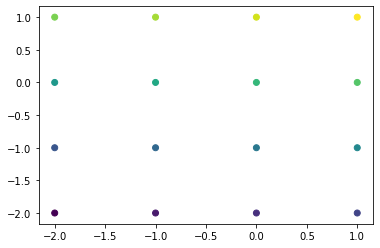

In [162]:
plt.scatter(x, y, c=index, cmap='viridis')
plt.show()

## Rotate Transform
Let us rotate the basis vectors by 45deg counter clockwise:

\begin{equation*}
T = 
\begin{bmatrix}
\cos\frac{\pi}{4} & -\sin\frac{\pi}{4} \\
\sin\frac{\pi}{4} & \cos\frac{\pi}{4}\\
\end{bmatrix}
\end{equation*}

In [179]:
import math
T = np.array([[math.cos(math.pi/4), -math.sin(math.pi/4)],[math.sin(math.pi/4), math.cos(math.pi/4)]])

In [180]:
print(T)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [181]:
T.shape

(2, 2)

In [198]:
a = np.reshape(a, (16,2))
b = T.dot(a.T)
b = b.T
b[-1]

array([1.11022302e-16, 1.41421356e+00])

In [196]:
x = b[:,0]
y = b[:,1]
x = np.reshape(x, (-1,1))
y = np.reshape(y, (-1,1))

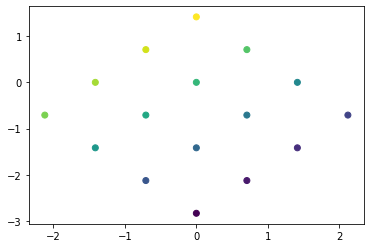

In [197]:
plt.scatter(x, y, c=index, cmap='viridis')
plt.show()

We can see from the plot that the points are correspondingly rotated. For example, in the canonical basis vectors, the point:

\begin{equation*}
\mathbf{p} = 
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\end{equation*}

has a new set of coordinates:

\begin{equation*}
\mathbf{p} = 
\begin{bmatrix}
0 \\
1.41
\end{bmatrix}
\end{equation*}